In [1]:
# Import all necessary libraries
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

In [3]:
class MyGD:
    
    # Initialize the attributes.
    alpha = 0.1
    maxEpochs = 0
    iteration = 0
    K = 0
    
    def __init__(self, alpha, maxEpochs, initialWeights):
        '''Constructor'''
        self.alpha = alpha
        self.maxEpochs = maxEpochs
        self.K = len(initialWeights)
        # Create empty structures.
        self.a_hist = np.zeros((self.K, self.maxEpochs))
        self.Jgd = np.zeros(self.maxEpochs)
        # Intialize the weights.
        self.a = np.array(initialWeights).reshape(self.K, 1)
        
    def getResults(self):
        '''Retrieve results.'''
        return self.a, self.Jgd, self.a_hist, self.iteration
    
    def get_params(self):
        return {'alpha' : self.alpha}
    
    def set_params(self, **params):
        self.alpha = params['alpha']
    
    def score(self, X, y_noisy):
        '''Return the mean squared error (MSE)'''
        N = len(y_noisy)
        yhat = X.dot(self.a)
        return (1.0/N)*sum(np.power(y_noisy - yhat, 2)) 

    def fit(self, X, y_noisy):
        '''Train the model with batch gradient descent.'''
        # Retrieve the number of examples.
        N = len(y_noisy)
        
        # Calculate the error for the initial weights.
        self.Jgd[0] = self.score(X, y_noisy)

        # Batch gradient descent loop.
        error = 1
        while(error > 0.001 and self.iteration < self.maxEpochs-1):

            # Hypothesis function.
            h = X.dot(self.a)

            # Calculate gradient vector.
            gradients = -(2.0/N)*X.T.dot(y_noisy - h)

            # Weight update rule.
            self.a = self.a - self.alpha*gradients

            # Store weight variation.
            self.a_hist[:, self.iteration+1] = self.a.reshape(self.K,)

            # Calculate and store actual error.
            self.Jgd[self.iteration+1] = self.score(X, y_noisy)
            
            # Error difference between actual and previous iteration.
            error = np.abs(self.Jgd[self.iteration]-self.Jgd[self.iteration+1])   

            # Increment iteration number.
            self.iteration += 1

In [4]:
# Number of pairs feature/label.
N = 1000

# Input values (features)
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# Noise.
w = np.random.randn(N, 1)

# True model.
y = x1 + x2

# Observable function.
y_noisy = y + w

In [5]:
# Closed-form solution.
X = np.block([x1, x2])

# Normal equation.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

# Hypothesis function.
yhat = X.dot(a_opt)
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

print('--- Eq. Normal ---')
print('a1_opt', a_opt[0][0])
print('a2_opt', a_opt[1][0])
print('Joptimum', Joptimum)

--- Eq. Normal ---
a1_opt 1.0373518580863197
a2_opt 1.0549021717423768
Joptimum 0.9809577522249409


In [6]:
# Gradient-descent solution.
maxEpochs = 10000

initialWeights = [-20.0, -20.0]

alpha = 1.0

gd = MyGD(alpha, maxEpochs, initialWeights)
gd.fit(X, y_noisy)
mse = gd.score(X, y_noisy)

a, Jgd, a_hist, iteration = gd.getResults()

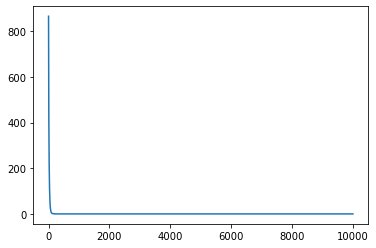

In [7]:
plt.plot(Jgd)
plt.show()

In [8]:
# Generate values for parameters.
M = 200
a1 = np.linspace(-30.0, 34.0, M)
a2 = np.linspace(-30.0, 34.0, M)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2
        J[iter1, iter2] = (1.0/N)*np.sum(np.square(y_noisy - yhat))

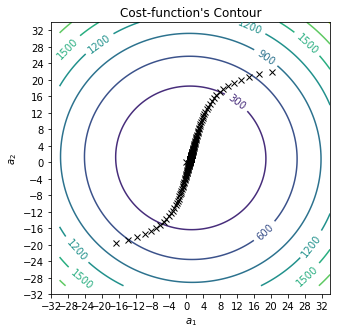

In [9]:
fig = plt.figure(figsize=(5,5))

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.title('Cost-function\'s Contour')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')

plt.xticks(np.arange(-32, 34, step=4.0))
plt.yticks(np.arange(-32, 34, step=4.0))
plt.show()